In [45]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

In [46]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, parser='auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [47]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [48]:
y.shape

(70000,)

In [49]:
y = y.astype(np.uint8) ### y was previously a string, we prefer integers

In [50]:
### Splitting into training ans testing sets

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In [51]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [52]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [53]:
sgd_clf.predict([X.iloc[0]])

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Perfomance Measures

### Measuring Accuracy Using Cross-Validation 

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5,
                cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

### Confusion Matrix

In [55]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

### Precision and Recall

In [57]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision/Recall Tradeoff

In [58]:
y_scores = sgd_clf.decision_function([X.iloc[0]])
y_scores

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [59]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [60]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [61]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                             cv=3, method='decision_function')

In [62]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

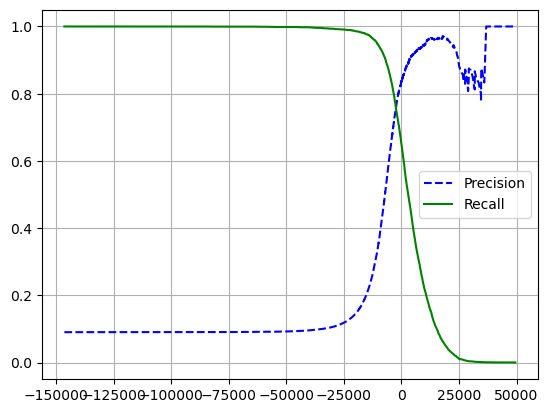

In [63]:
def plt_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend()
    plt.grid()
    
    
plt_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### ROC Curve

In [64]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

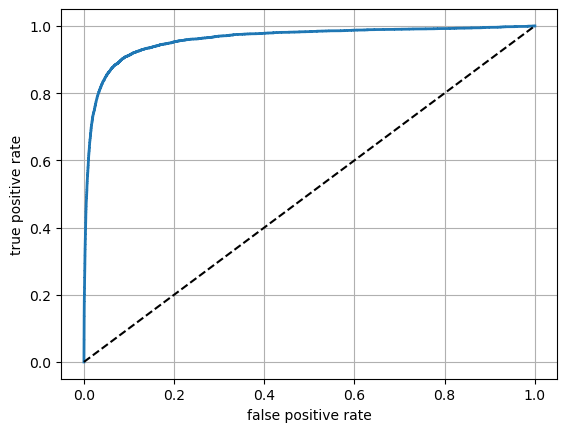

In [65]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.grid()
    
plot_roc_curve(fpr, tpr)
plt.show()

In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores) ### area under the curve

0.9604938554008616

In [67]:
### Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                    cv=3, method='predict_proba')

In [68]:
## for roc curve we need scores not probability so we convert it to scores 

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

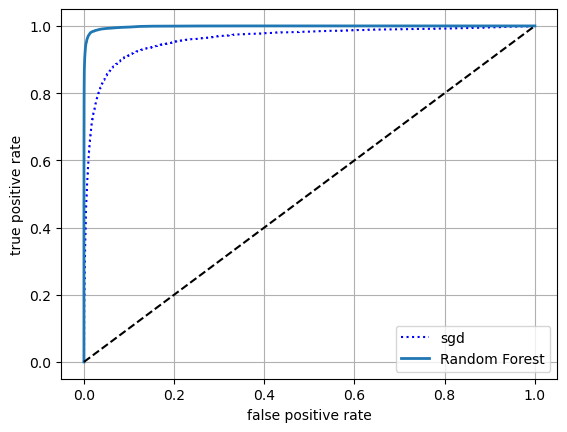

In [69]:
plt.plot(fpr, tpr, 'b:', label='sgd')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend()
plt.show()

In [70]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

#### Lets detect more than just 5s

In [71]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X.iloc[0]]) ### correct prediction is 5

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [72]:
### OneVsOneClassifier

from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([X.iloc[0]]) ## correct prediction 5

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [73]:
### training random forest classifier

forest_clf.fit(X_train, y_train)
forest_clf.predict([X.iloc[0]])

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [74]:
### Evaluating the SGDClassifier 

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [75]:
### Standard scaling

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# cross_val_score(sgd_clf, X_train_scaled, y_train,
#                 cv=3, scoring='accuracy')

# output -> array([0.8983, 0.891 , 0.9018])

### Multilabel Classification 

In [76]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [77]:
knn_clf.predict([X.iloc[0]])

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

# Exercise 


In [78]:
# Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
# on the test set. Hint: the KNeighborsClassifier works quite well for this task;
# you just need to find good hyperparameter values (try a grid search on the
# weights and n_neighbors hyperparameters).

In [79]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
knn_clf.predict([X.iloc[0]])

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [81]:
# cross validation 
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.9676 , 0.9671 , 0.96755])

In [82]:
# f1 score 
y_train_predict = cross_val_predict(knn_clf, X_train, y_train, cv=3)

f1_score(y_train, y_train_predict, average='macro')

0.9672164755274896

In [83]:
#fine tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=5, verbose=0)


In [84]:
# grid_search.fit(X_train, y_train)

# Executed

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [85]:
# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# output -> Best parameters found:  {'n_neighbors': 3, 'weights': 'distance'}
#           Best cross-validation score: 0.97

Best parameters found:  {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.97


In [86]:
### evaluating the test set 

# best_knn = grid_search.best_estimator_
# test_score = best_knn.score(X_test, y_test)
# print("Test set score: {:.2f}".format(test_score))

# output -> Test set score: 0.97

Test set score: 0.97
